# Lets train a FFNN for a Regression Problem

In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

## Reading the dataset

In [2]:
df=pd.read_csv('cardio_dataset.csv')
df

,SEX,AGEIR,TC,HDL,SMOKE_,BPMED,DIAB_01,RISK
0,2,48,236,66,0,2,0,1.1
1,1,48,260,51,0,2,1,7.0
2,1,44,187,49,1,2,0,7.0
3,2,42,216,57,1,2,0,0.4
4,2,56,156,42,0,2,0,2.2
...,...,...,...,...,...,...,...,...
6639,2,65,307,42,1,1,1,36.6
6640,2,42,169,56,0,1,0,0.8
6641,1,65,212,35,1,1,0,30.6
6642,1,66,184,39,0,1,0,23.8


# data and target

In [3]:
dataset=df.values

data=dataset[:,0:7]
target=dataset[:,7]


In [4]:
print(data,data.shape)

[[  2.  48. 236. ...   0.   2.   0.]
 [  1.  48. 260. ...   0.   2.   1.]
 [  1.  44. 187. ...   1.   2.   0.]
 ...
 [  1.  65. 212. ...   1.   1.   0.]
 [  1.  66. 184. ...   0.   1.   0.]
 [  2.  45. 203. ...   0.   2.   0.]] (6644, 7)


In [5]:
print(target,target.shape)

[ 1.1  7.   7.  ... 30.6 23.8  1. ] (6644,)


In [6]:
#1D to 2D

target=np.reshape(target, (-1,1))

print(target.shape,target)

(6644, 1) [[ 1.1]
 [ 7. ]
 [ 7. ]
 ...
 [30.6]
 [23.8]
 [ 1. ]]


# Scaling

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler()

scaler_target = MinMaxScaler()

#scaler_data.fit(data)
#scaler_target.fit(target)

#data_scaled=scaler_data.transform(data)
#target_scaled=scaler_target.transform(target)

data_scaled=scaler_data.fit_transform(data)
target_scaled=scaler_target.fit_transform(target)

In [8]:
print(data[:10])

[[  2.  48. 236.  66.   0.   2.   0.]
 [  1.  48. 260.  51.   0.   2.   1.]
 [  1.  44. 187.  49.   1.   2.   0.]
 [  2.  42. 216.  57.   1.   2.   0.]
 [  2.  56. 156.  42.   0.   2.   0.]
 [  1.  44. 162.  57.   1.   2.   0.]
 [  1.  50. 244.  47.   0.   2.   0.]
 [  1.  48. 212.  30.   1.   2.   0.]
 [  2.  66. 202.  53.   0.   2.   1.]
 [  1.  63. 186.  46.   1.   2.   0.]]


In [9]:
print(data_scaled[:10])  #resuls after normalize

[[1.         0.20512821 0.40045249 0.29347826 0.         1.
  0.        ]
 [0.         0.20512821 0.45475113 0.21195652 0.         1.
  1.        ]
 [0.         0.1025641  0.28959276 0.20108696 1.         1.
  0.        ]
 [1.         0.05128205 0.35520362 0.24456522 1.         1.
  0.        ]
 [1.         0.41025641 0.21945701 0.16304348 0.         1.
  0.        ]
 [0.         0.1025641  0.23303167 0.24456522 1.         1.
  0.        ]
 [0.         0.25641026 0.41855204 0.19021739 0.         1.
  0.        ]
 [0.         0.20512821 0.34615385 0.09782609 1.         1.
  0.        ]
 [1.         0.66666667 0.32352941 0.22282609 0.         1.
  1.        ]
 [0.         0.58974359 0.28733032 0.18478261 1.         1.
  0.        ]]


In [10]:
print(target[:10])
print(target_scaled[:10])

[[ 1.1]
 [ 7. ]
 [ 7. ]
 [ 0.4]
 [ 2.2]
 [ 3. ]
 [ 4.2]
 [17.4]
 [13.4]
 [17.3]]
[[0.01172333]
 [0.08089097]
 [0.08089097]
 [0.003517  ]
 [0.02461899]
 [0.03399766]
 [0.04806565]
 [0.2028136 ]
 [0.15592028]
 [0.20164127]]


# Why Scaling?

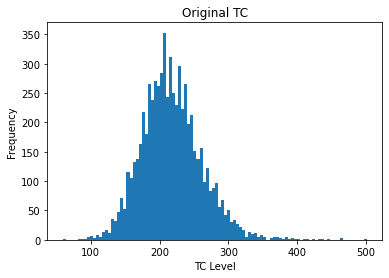

In [11]:
#taking second column "TC"

plt.hist(data[:,2],bins=100)

plt.title('Original TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')

plt.show()

In [12]:
print(np.min(data[:,2]),np.max(data[:,2]))

59.0 501.0


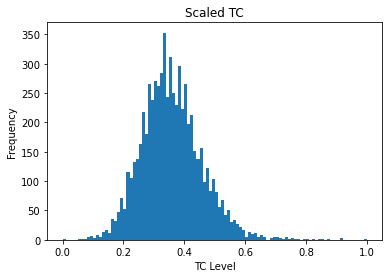

In [13]:
plt.hist(data_scaled[:,2],bins=100)
plt.title('Scaled TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

# Other Scaling Methods

## 1 Standard Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data)

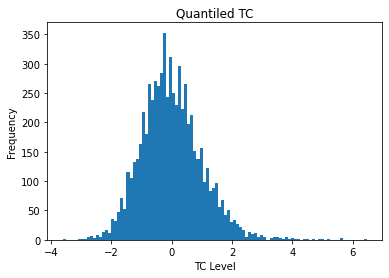

In [15]:
plt.hist(standard_scaled_data[:,2],bins=100)
plt.title('Quantiled TC')
plt.xlabel('TC Level')
plt.ylabel('Frequency')
plt.show()

This type of scaling removes mean and scale data to unit variance. It is defined by the formula
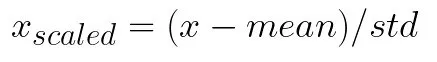
where mean is the mean of the training samples, and std is the standard deviation of the training samples. The best way to understand it is to look at it in practice. For that we use SciKit Learn and StandardScaler class:

## Quantile Transformation

As we mentioned, sometimes machine learning algorithms require that the distribution of our data is uniform or normal. We can achieve that using QuantileTransformer class from SciKit Learn. First, here is how it looks like when we transform our data to uniform distribution:

In [16]:
from sklearn.preprocessing import QuantileTransformer

qtrans = QuantileTransformer(output_distribution='normal', random_state=0)
quantile_transformed_data = qtrans.fit_transform(data)

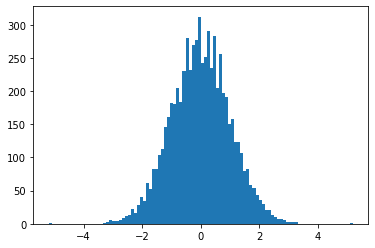

In [17]:
plt.hist(quantile_transformed_data[:,2],bins=100)
plt.show()

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data_scaled, target_scaled,test_size=0.2)

In [19]:
print(train_data,train_data.shape)

[[0.         0.20512821 0.40950226 ... 1.         1.         0.        ]
 [1.         0.05128205 0.25791855 ... 1.         1.         0.        ]
 [1.         0.61538462 0.33031674 ... 0.         1.         0.        ]
 ...
 [0.         0.15384615 0.25339367 ... 1.         1.         0.        ]
 [1.         0.84615385 0.57013575 ... 0.         0.         1.        ]
 [1.         0.25641026 0.12895928 ... 1.         1.         0.        ]] (5315, 7)


In [20]:
print(test_data,test_data.shape)

[[0.         0.76923077 0.45701357 ... 0.         0.         0.        ]
 [1.         0.58974359 0.32352941 ... 0.         0.         1.        ]
 [1.         0.33333333 0.46606335 ... 0.         1.         0.        ]
 ...
 [0.         0.         0.52262443 ... 1.         1.         0.        ]
 [1.         0.58974359 0.44117647 ... 0.         1.         0.        ]
 [0.         0.         0.40950226 ... 0.         1.         0.        ]] (1329, 7)


# FFNN Architecture

In [21]:
import keras.models as models
import keras.layers as layers
#import keras.optimizers as optimizers

from keras.layers import Dropout

import numpy as np

model = models.Sequential()
model.add(layers.Dense(128, input_dim=7, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [22]:
history=model.fit(train_data,train_target,epochs=200,validation_data=(test_data,test_target))

Epoch 1/200
167/167 [==============================] - 1s 2ms/step - loss: 0.0342 - mae: 0.1273 - val_loss: 0.0201 - val_mae: 0.0998
Epoch 2/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0171 - mae: 0.0954 - val_loss: 0.0139 - val_mae: 0.0841
Epoch 3/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0146 - mae: 0.0866 - val_loss: 0.0112 - val_mae: 0.0747
Epoch 4/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0139 - mae: 0.0826 - val_loss: 0.0118 - val_mae: 0.0773
Epoch 5/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0124 - mae: 0.0780 - val_loss: 0.0095 - val_mae: 0.0701
Epoch 6/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0120 - mae: 0.0770 - val_loss: 0.0100 - val_mae: 0.0712
Epoch 7/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0117 - mae: 0.0746 - val_loss: 0.0083 - val_mae: 0.0634
Epoch 8/200
167/167 [==============================] - 0s 1ms/step - 

167/167 [==============================] - 0s 1ms/step - loss: 0.0072 - mae: 0.0576 - val_loss: 0.0043 - val_mae: 0.0420
Epoch 63/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0070 - mae: 0.0570 - val_loss: 0.0038 - val_mae: 0.0391
Epoch 64/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0078 - mae: 0.0587 - val_loss: 0.0040 - val_mae: 0.0414
Epoch 65/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0071 - mae: 0.0576 - val_loss: 0.0044 - val_mae: 0.0422
Epoch 66/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0072 - mae: 0.0579 - val_loss: 0.0047 - val_mae: 0.0450
Epoch 67/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0071 - mae: 0.0583 - val_loss: 0.0041 - val_mae: 0.0411
Epoch 68/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0071 - mae: 0.0582 - val_loss: 0.0055 - val_mae: 0.0470
Epoch 69/200
167/167 [==============================] - 0s 1ms/step - loss:

167/167 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0549 - val_loss: 0.0044 - val_mae: 0.0426
Epoch 124/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0553 - val_loss: 0.0044 - val_mae: 0.0447
Epoch 125/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0557 - val_loss: 0.0045 - val_mae: 0.0477
Epoch 126/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0070 - mae: 0.0558 - val_loss: 0.0044 - val_mae: 0.0428
Epoch 127/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0070 - mae: 0.0569 - val_loss: 0.0044 - val_mae: 0.0418
Epoch 128/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0066 - mae: 0.0554 - val_loss: 0.0042 - val_mae: 0.0430
Epoch 129/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0557 - val_loss: 0.0042 - val_mae: 0.0417
Epoch 130/200
167/167 [==============================] - 0s 1ms/step 

Epoch 184/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0068 - mae: 0.0562 - val_loss: 0.0047 - val_mae: 0.0449
Epoch 185/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0066 - mae: 0.0552 - val_loss: 0.0041 - val_mae: 0.0422
Epoch 186/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0068 - mae: 0.0559 - val_loss: 0.0045 - val_mae: 0.0445
Epoch 187/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0564 - val_loss: 0.0044 - val_mae: 0.0437
Epoch 188/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0554 - val_loss: 0.0040 - val_mae: 0.0423
Epoch 189/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0067 - mae: 0.0548 - val_loss: 0.0043 - val_mae: 0.0436
Epoch 190/200
167/167 [==============================] - 0s 1ms/step - loss: 0.0072 - mae: 0.0564 - val_loss: 0.0042 - val_mae: 0.0435
Epoch 191/200
167/167 [==============================] 

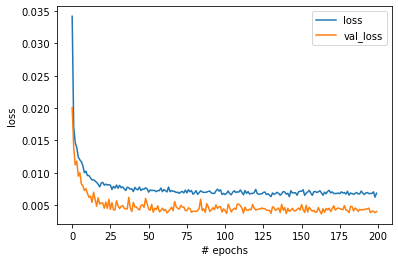

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val_loss')

plt.legend()
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.show()
plt.savefig('with_Dropout.png')

#without dropout
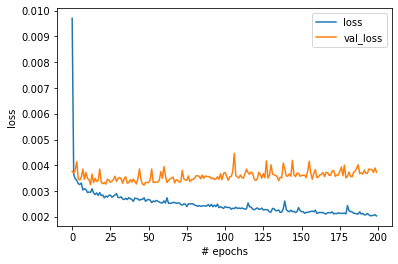

# Problem of Overfitting

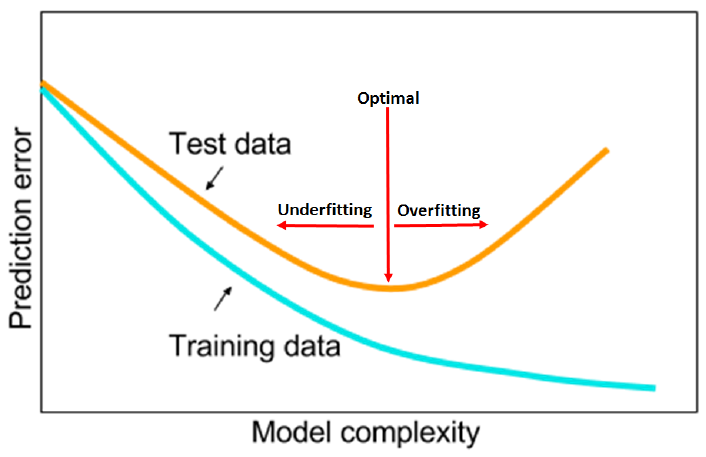

## Solutions,

1. Early Stopping
2. Dropout Layers
3. Batch Normalization
4. Reguralization
5. Reduce the Complexity
6. Data Augmentation

# R2 Score

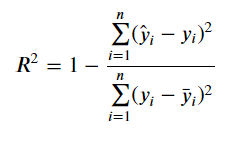

In [24]:
from sklearn.metrics import r2_score

predicted_result=model.predict(test_data)

r2=r2_score(test_target,predicted_result)
print('r2 score:',r2)

r2 score: 0.8253720076707496


In [25]:
print('actual:',test_target[:10].T)
print('predicted:',predicted_result[:10].T)

actual: [[0.28135991 0.37162954 0.00937866 0.27080891 0.01289566 0.1137163
  0.23446659 0.06096131 0.14302462 0.16764361]]
predicted: [[0.33032733 0.24622966 0.05035473 0.3805138  0.04786482 0.11300534
  0.21906036 0.07426158 0.13783419 0.19771706]]


**Inverse scaling

In [26]:
print('actual inverse scaled:',scaler_target.inverse_transform(test_target[:10]).T)
print('predicted inverse scaled:',scaler_target.inverse_transform(predicted_result[:10]).T)

actual inverse scaled: [[24.1 31.8  0.9 23.2  1.2  9.8 20.1  5.3 12.3 14.4]]
predicted inverse scaled: [[28.276922  21.10339    4.3952584 32.557827   4.1828694  9.739356
  18.785849   6.4345126 11.857257  16.965265 ]]


In [27]:
my_test_data=[1,56,156,42,0,1,0]
my_test_data=scaler_data.transform([my_test_data])
result=model.predict(my_test_data)
actual=7
predicted = scaler_target.inverse_transform(result)

print('Actual Result:',actual)
print('Predicted Result:',predicted)

Actual Result: 7
Predicted Result: [[11.470548]]


In [28]:
import joblib

model.save('cardio-FFNN.model')

joblib.dump(scaler_data,'scaler_data.sav')
joblib.dump(scaler_target,'scaler_target.sav')


INFO:tensorflow:Assets written to: cardio-FFNN.model\assets


['scaler_target.sav']